In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
data = pd.read_csv('complete_dataset_cleaned.csv')
data.pop('Pkey')
data.pop('date')

0        2020-07-17
1        2020-07-18
2        2020-07-20
3        2020-07-21
4        2020-07-22
            ...    
28366    2022-10-07
28367    2022-10-08
28368    2022-10-09
28369    2022-10-10
28370    2022-10-11
Name: date, Length: 28371, dtype: object

In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [3]:
data.iloc[1,:]

continent                            Africa
location                            Algeria
new_cases_per_million                13.604
new_deaths_per_million                0.249
reproduction_rate                      1.18
total_vaccinations_per_hundred          0.0
stringency_index                      74.07
population_density                   17.348
gdp_percentage_weekly                   NaN
gdp_per_capita                    13913.839
cardiovasc_death_rate               278.364
diabetes_prevalence                    6.73
female_smokers                          0.7
male_smokers                           30.4
hospital_beds_per_thousand              1.9
life_expectancy                       76.88
human_development_index               0.748
icu_patients_per_million              1.517
Unnamed: 20                             NaN
severity                          54.634538
Name: 1, dtype: object

In [4]:
data=data.iloc[:,:-2]
data=data.iloc[:,2:]
data.head()

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_percentage_weekly,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,icu_patients_per_million
0,13.423,0.113,1.20,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.403
1,13.604,0.249,1.18,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.517
2,13.740,0.204,1.15,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.449
3,13.287,0.294,1.14,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.268
4,13.446,0.249,1.13,0.0,74.07,17.348,NaN,13913.839,278.364,6.73,0.7,30.4,1.9,76.88,0.748,1.154


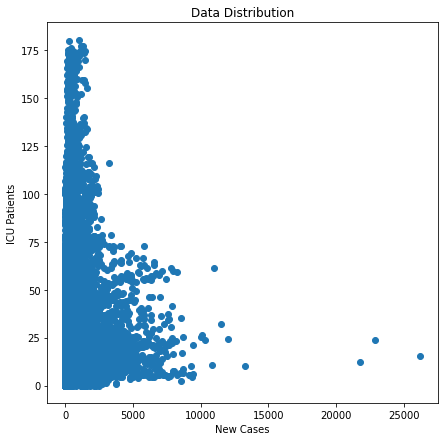

In [5]:
plt.figure(figsize=(7,7))
plt.scatter(data["new_cases_per_million"],data["icu_patients_per_million"])
plt.xlabel('New Cases')
plt.ylabel('ICU Patients')
plt.title('Data Distribution')
plt.show()

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [7]:
data=clean_dataset(data)

In [8]:
import numpy as np                              # import numpy
from numpy.linalg import inv                    # for matrix inverse
import matplotlib.pyplot as plt                 # import matplotlib.pyplot for plotting framework
from scipy.stats import multivariate_normal     # for generating pdf

In [28]:
m1 = [1,1]      # consider a random mean and covariance value
m2 = [7,7]                                              
cov1 = [[3, 2], [2, 3]]                                      
cov2 = [[2, -1], [-1, 2]]
x = np.random.multivariate_normal(m1, cov1, size=(200,))  # Generating 200 samples for each mean and covariance
y = np.random.multivariate_normal(m2, cov2, size=(200,))
d = np.concatenate((x, y), axis=0)
y

array([[ 5.62611292,  6.42516463],
       [ 4.23162511, 10.73234908],
       [ 5.67222487,  6.91400978],
       [ 7.4176635 ,  6.64132116],
       [ 5.29771335,  8.12245633],
       [ 7.23345933,  6.26733814],
       [ 5.70391139,  8.26174981],
       [ 7.70089848,  4.7598837 ],
       [ 7.86102558,  7.85271268],
       [ 3.94940779,  9.16080402],
       [ 8.67816745,  4.93039387],
       [ 8.04264787,  6.05898724],
       [ 5.38143156,  6.4123121 ],
       [ 6.95284855,  6.98529406],
       [ 6.31340537,  8.37259851],
       [ 8.734562  ,  5.19205581],
       [ 5.24319123,  6.59180957],
       [ 5.46607942,  8.52995314],
       [ 6.60399428,  9.80500311],
       [ 8.09403495,  5.72255044],
       [ 7.40171878,  7.35607449],
       [ 7.29969041,  8.88217777],
       [ 6.42040559,  8.59199095],
       [ 7.26075717,  7.84417121],
       [ 6.57011105,  7.52026532],
       [ 7.37753882,  7.05694223],
       [ 6.39016005,  5.97822926],
       [ 6.02004718,  8.40928774],
       [ 7.32121766,

In [26]:
x=np.array(data['total_vaccinations_per_hundred'])
y=np.array(data['icu_patients_per_million'])
d = np.concatenate((x, y), axis=0)
d

array([0.   , 0.   , 0.   , ..., 6.364, 6.364, 5.795])

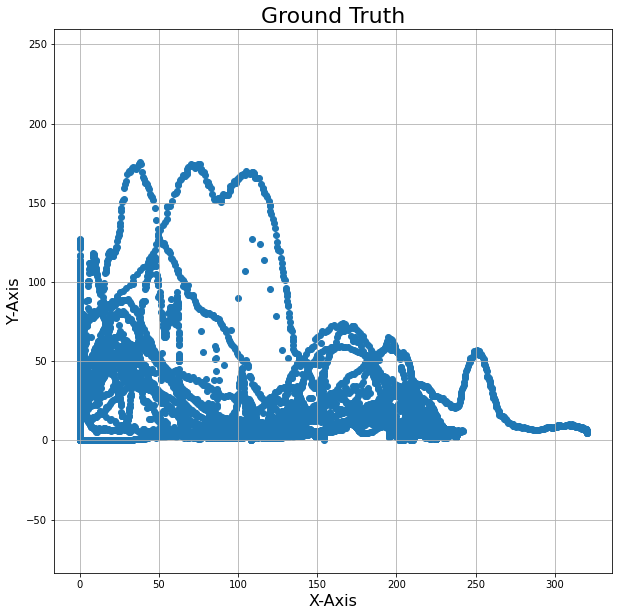

In [22]:
plt.figure(figsize=(10,10))                                 
plt.scatter(x, y, marker='o')     
plt.axis('equal')                                  
plt.xlabel('X-Axis', fontsize=16)              
plt.ylabel('Y-Axis', fontsize=16)                     
plt.title('Ground Truth', fontsize=22)    
plt.grid()            
plt.show()

In [23]:
import random
m1 = random.choice(x)
m2 = random.choice(y)
cov1 = np.cov(np.transpose(x))
cov2 = np.cov(np.transpose(y))
pi = 0.5

ValueError: ignored

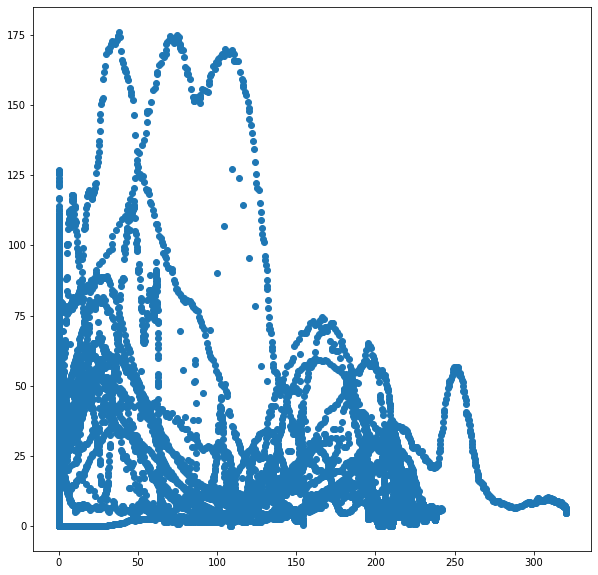

In [25]:
x1 = np.linspace(-4,11,200)  
x2 = np.linspace(-4,11,200)
X, Y = np.meshgrid(x1,x2) 

Z1 = multivariate_normal(m1, cov1)  
Z2 = multivariate_normal(m2, cov2)

pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
pos[:, :, 0] = X; pos[:, :, 1] = Y   

plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
plt.scatter(x, y, marker='o')     
plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
plt.axis('equal')                                                                  # making both the axis equal
plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
plt.title('Initial State', fontsize=22)                                            # Title of the plot
plt.grid()                                                                         # displaying gridlines
plt.show()

In [17]:
##Expectation step
def Estep(lis1):
    m1=lis1[0]
    m2=lis1[1]
    cov1=lis1[2]
    cov2=lis1[3]
    pi=lis1[4]
    
    pt2 = multivariate_normal.pdf(d, mean=m2, cov=cov2)
    pt1 = multivariate_normal.pdf(d, mean=m1, cov=cov1)
    w1 = pi * pt2
    w2 = (1-pi) * pt1
    eval1 = w1/(w1+w2)

    return(eval1)

In [18]:
## Maximization step
def Mstep(eval1):
    num_mu1,din_mu1,num_mu2,din_mu2=0,0,0,0

    for i in range(0,len(d)):
        num_mu1 += (1-eval1[i]) * d[i]
        din_mu1 += (1-eval1[i])

        num_mu2 += eval1[i] * d[i]
        din_mu2 += eval1[i]

    mu1 = num_mu1/din_mu1
    mu2 = num_mu2/din_mu2

    num_s1,din_s1,num_s2,din_s2=0,0,0,0
    for i in range(0,len(d)):

        q1 = np.matrix(d[i]-mu1)
        num_s1 += (1-eval1[i]) * np.dot(q1.T, q1)
        din_s1 += (1-eval1[i])

        q2 = np.matrix(d[i]-mu2)
        num_s2 += eval1[i] * np.dot(q2.T, q2)
        din_s2 += eval1[i]

    s1 = num_s1/din_s1
    s2 = num_s2/din_s2

    pi = sum(eval1)/len(d)
    
    lis2=[mu1,mu2,s1,s2,pi]
    return(lis2)

In [19]:
def plot(lis1):
    mu1=lis1[0]
    mu2=lis1[1]
    s1=lis1[2]
    s2=lis1[3]
    Z1 = multivariate_normal(mu1, s1)  
    Z2 = multivariate_normal(mu2, s2)

    pos = np.empty(X.shape + (2,))                # a new array of given shape and type, without initializing entries
    pos[:, :, 0] = X; pos[:, :, 1] = Y   

    plt.figure(figsize=(10,10))                                                          # creating the figure and assigning the size
    plt.scatter(d[:,0], d[:,1], marker='o')     
    plt.contour(X, Y, Z1.pdf(pos), colors="r" ,alpha = 0.5) 
    plt.contour(X, Y, Z2.pdf(pos), colors="b" ,alpha = 0.5) 
    plt.axis('equal')                                                                  # making both the axis equal
    plt.xlabel('X-Axis', fontsize=16)                                                  # X-Axis
    plt.ylabel('Y-Axis', fontsize=16)                                                  # Y-Axis
    plt.grid()                                                                         # displaying gridlines
    plt.show()

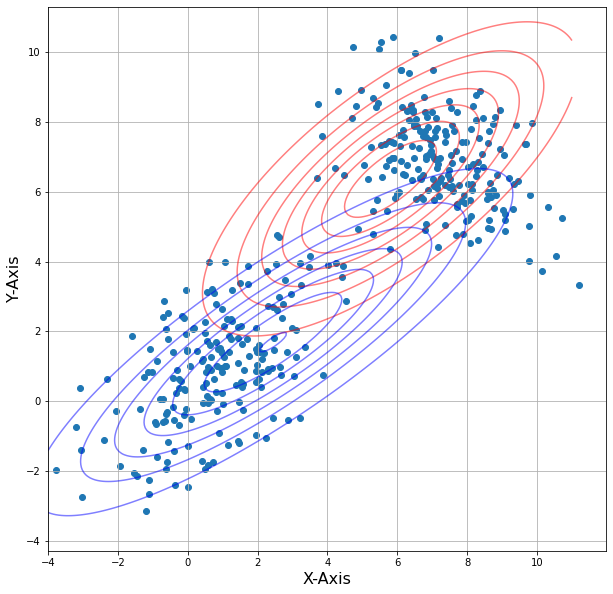

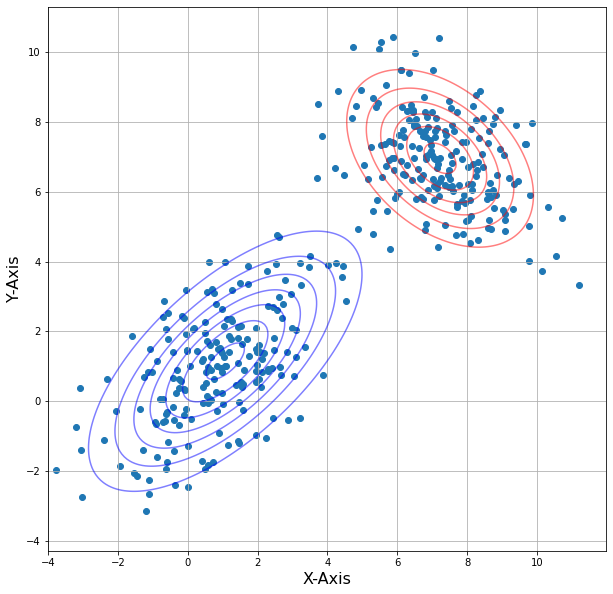

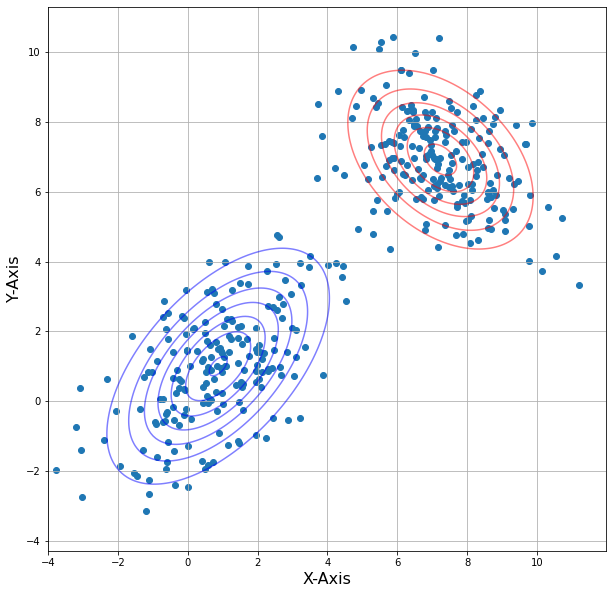

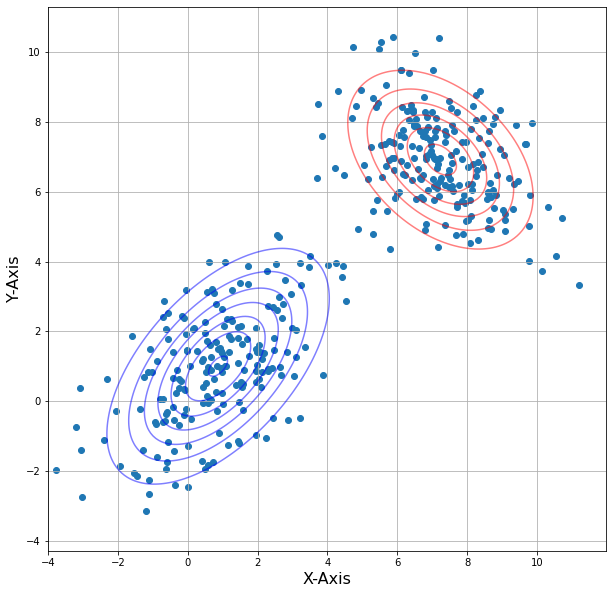

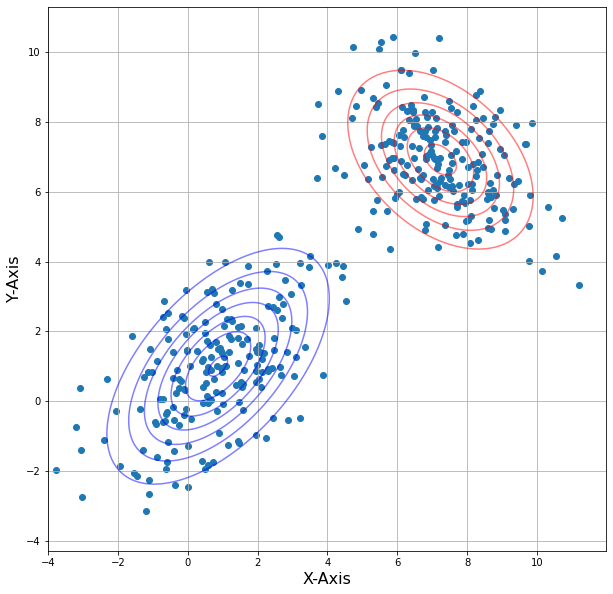

In [20]:
iterations = 20
lis1=[m1,m2,cov1,cov2,pi]
for i in range(0,iterations):
    lis2 = Mstep(Estep(lis1))
    lis1=lis2
    if(i==0 or i == 4 or i == 9 or i == 14 or i == 19):
        plot(lis1)